In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [45]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
def visualize(original, augmented):
    # fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    
    plt.imshow(augmented)
    flipped = tf.image.flip_left_right(original)
    visualize(original, flipped)

In [11]:
import tensorflow_datasets as tfds
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
     split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
     with_info=True,
     as_supervised=True,)
print(val_ds.get_single_element)
# train_ds = train_ds.shuffle(1000).map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

<bound method DatasetV2.get_single_element of <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>>


In [26]:
import os
from PIL.PngImagePlugin import Image
check = os.path.isfile('datasetJPEG\\0vzkrpTuBC8.jpeg')
path = 'datasetJPEG\\0vzkrpTuBC8.jpeg'
# print(check)
# path = os.path.join('/dataset/0vzkrpTuBC8.png')
# print(path)
image = Image.open(path)
image.show()
image_tensor = tf.convert_to_tensor(image)
print(image_tensor)
# Load_image = tf.keras.preprocessing.image.load_img(path)
# print(tf.convert_to_tensor(Load_image))
# visualize(Load_image,Load_image)

ValueError: Attempt to convert a value (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x24BDC031210>) with an unsupported type (<class 'PIL.JpegImagePlugin.JpegImageFile'>) to a Tensor.

In [6]:
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'dataset\_k1pDi4AjG8.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print (vgg16_feature.shape)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [7]:
vgg16_feature

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ..., 41.472427  ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [87]:
from tensorflow.keras.models import Model
import os

image_features = {}
model_vgg16 = VGG16()
model_vgg16 = Model(inputs=model_vgg16.inputs,outputs = model_vgg16.layers[-2].output)
model_vgg16.summary()
vgg16_feature_list = []
file = 'dataset\*.png'
ls = []
# for filename in os.listdir('dataset'):
#     ls.append(filename)
for i, filename  in enumerate(os.listdir('dataset')):
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset\\'+filename, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model_vgg16.predict(img_data)
    image_features[filename] = vgg16_feature
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [73]:
print(image_features['6AN1AifVyds.png'])

[[0.         5.6851068  0.         ... 0.         0.         0.68992186]]


In [74]:
img = image.load_img('dataset\_0VnLoJqbA0.png', target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature = model_vgg16.predict(img_data)
print(vgg16_feature)    

1/1 [==============================] - 0s 17ms/step
[[0.        0.        0.        ... 0.        0.        3.2573392]]


In [75]:
img = image.load_img('dataset\_2uj8NyqxEA.png', target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature = model_vgg16.predict(img_data)
print(vgg16_feature)

1/1 [==============================] - 0s 15ms/step
[[0.        0.        0.        ... 0.        0.8799699 1.0909272]]


In [98]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=15, random_state=0).fit(vgg16_feature_list)




c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [99]:
clusters = kmeans.fit_predict(vgg16_feature_list)
len(clusters)

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


1733

In [101]:
dic = {}
for i in clusters:
    if i not in dic:
        dic[i]=1
    else:
        dic[i] = dic[i]+1 

print(sorted(dic.items()))

[(0, 45), (1, 120), (2, 160), (3, 87), (4, 127), (5, 164), (6, 88), (7, 124), (8, 98), (9, 88), (10, 139), (11, 117), (12, 105), (13, 178), (14, 93)]


In [67]:
print(model_vgg16.summary())

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [90]:

print(len(vgg16_feature_list[200]))
for i in vgg16_feature_list[200]:
    if(i != 0):
        print(i)

4096
0.14498901
0.6419732
1.7853625
0.0530802
0.59896535
0.9910748
1.3190029
0.45047498
0.8163098
0.51822555
1.1789566
0.99893665
1.9970582
4.1005197
1.0969973
2.304956
2.323495
0.24877557
4.2341
3.260021
0.36739737
0.8531791
2.020311
0.38560203
0.29104105
0.857388
0.2910338
0.21913043
1.0548134
1.5158184
0.15419126
0.7773975
0.8490825
0.6563772
0.3207332
1.1912563
2.8284383
3.7571232
1.0202479
0.40980285
3.969821
0.34386525
2.0937595
1.9032453
0.9522325
4.9075594
0.5567681
1.8523059
0.5888647
5.8002768
1.078622
1.0982151
1.9992507
1.072034
1.1235034
2.3418643
0.04571423
1.9007658
0.7217727
0.23256493
2.1192517
2.4437473
1.8531121
0.6244005
0.14619792
0.2423602
0.10776064
0.36191428
1.1283597
0.39234483
2.8822474
0.6936064
0.8186646
0.461703
1.5333283
0.27568704
0.68488
1.9064811
0.41548014
1.5311818
1.3116994
0.1631572
0.24111086
0.05577296
0.041074753
2.8007703
1.9054003
2.4026837
0.4997405
3.24736
1.0239891
1.1311736
2.4518697
0.057647705
1.535893
4.150059
0.20852911
4.209257
0.3064

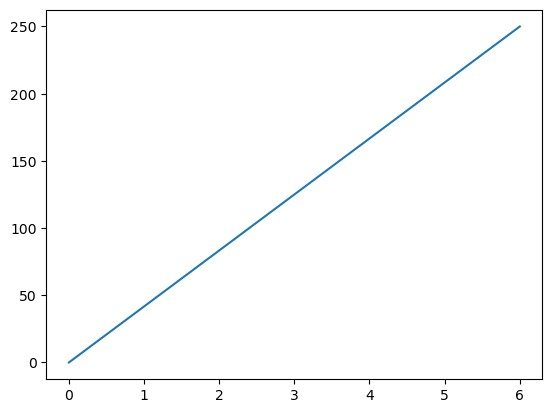

In [7]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()